# 911 Calls Capstone Project

Для этого завершающего проекта мы будем анализировать некоторые данные о вызовах службы экстренной помощи из Kaggle.  [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Данные содержат следующие поля:
* lat : String variable, Latitude (Широта)
* lng: String variable, Longitude (Долгота)
* desc: String variable, Description of the Emergency Call (Описание экстренного вызова)
* zip: String variable, Zipcode (Почтовый индекс)
* title: String variable, Title (Название)
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS 
* twp: String variable, Township (Городок)
* addr: String variable, Address (Аддрес)
* e: String variable, Dummy variable (always 1) (Фиктивная переменная)

Просто используйте этот notebook и попробуйте выполнить задания / ответить на вопросы, выделенные жирным шрифтом, используя свои навыки работы с Python и Data Science!

## Данные и настройка

____
** Импортируйте numpy и pandas **

In [265]:
import pandas as pd
import numpy as np

** Импортируйте библиотеки визуализации и установите %matplotlib inline. **

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Прочитайте файл csv как дата сет с именем df**

In [267]:
df = pd.read_csv('911.csv')

**Проверьте информацию info() из df**

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Покажите первые пять сток от df **

In [269]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Основные вопросы

**Каковы 5 лучших почтовых индексов для звонков в 911?**

In [270]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Каковы первые 5 городов (twp) для звонков в службу 911?**

In [271]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Взгляните на столбец «title», сколько там уникальных элементов заголовков?**

In [272]:
df['title'].nunique()

110

## Создание новых признаков

** В столбце title перед кодом заголовка указаны «Причины/Отделы» ("Reasons/Departments"). Это EMS, Fire и Traffic. Используйте метод .apply() с лямбда-выражением создав свою функцию, чтобы создать новый столбец с именем «Reasons», содержащий это строковое значение.**

**Например, если значением столбца заголовка является EMS: BACK PAINS/INJURY , значением столбца Reason будет EMS. **

In [273]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [274]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


**Какова наиболее распространенная причина (Reason) звонков в службу экстренной помощи, основанная на новом столбце?**

In [275]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Используйте seaborn, чтобы создать countplot вызовов службы 911 по столбцу Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

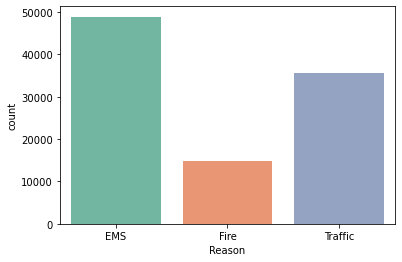

In [276]:
sns.countplot(x='Reason', data=df, palette='Set2')

<AxesSubplot:xlabel='Reason', ylabel='count'>

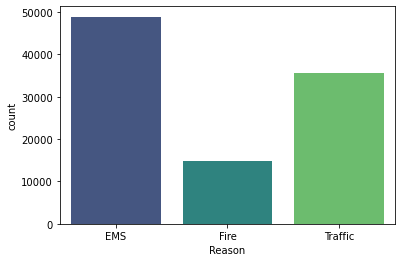

___
**Теперь давайте сосредоточимся на данных о времени. Каков тип данных объектов в столбце timeStamp?**

In [277]:
type(df['timeStamp'][0])

str

str

**Вы можете заметить, что эти временные метки по-прежнему являются строками. Используйте [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) для преобразования столбца из строк в объекты DateTime.**

In [278]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [279]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Теперь вы можете получить определенные атрибуты из объекта Datetime, вызвав их. Например:**

    time = df['timeStamp'].iloc[0]
    time.hour

****Вы можете использовать метод tab в Jupyter для изучения различных атрибутов, которые вы можете вызывать. Теперь, когда столбец timestamp на самом деле является объектом DateTime, используйте .apply() для создания 3 новых столбцов с именами Hour, Month и Day of Week. Вы создадите эти столбцы на основе столбца timeStamp, ссылайтесь на решения, если вы застряли на этом шаге.**

In [280]:
df['Hour'] = df['timeStamp'].iloc[:].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].iloc[:].apply(lambda x: x.month)
df['Dayofweek'] = df['timeStamp'].iloc[:].apply(lambda x: x.dayofweek)

In [281]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


**Обратите внимание, что День недели представляет собой целое число от 0 до 6. Используйте .map() с этим словарем, чтобы сопоставить фактические имена строк с днем недели:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [282]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [283]:
df['Dayofweek'] = df['Dayofweek'].map(dmap)

In [284]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


**Теперь используйте seaborn, чтобы создать график столбца «Day of Week» в контексте столбца «Reason».**

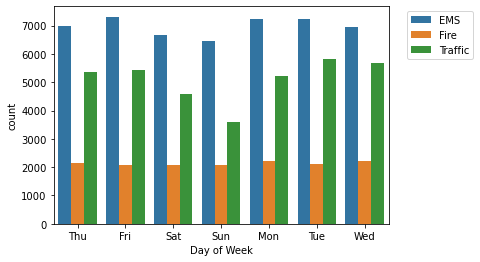

In [285]:
sns.countplot(x='Dayofweek', hue='Reason', data=df)

# Add labels and title
plt.xlabel('Day of Week')
plt.legend(loc=2, bbox_to_anchor=(1.04, 1))

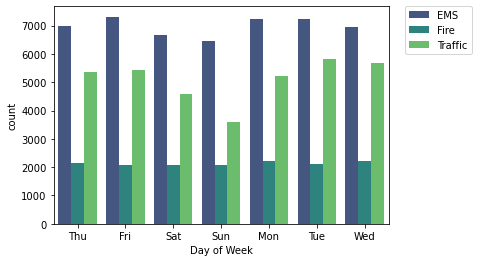

**Теперь сделайте то же самое для месяца:**

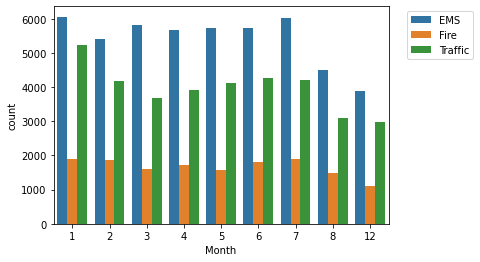

In [286]:
sns.countplot(x='Month', hue='Reason', data=df)

# Add labels and title
plt.legend(loc=2, bbox_to_anchor=(1.04, 1))

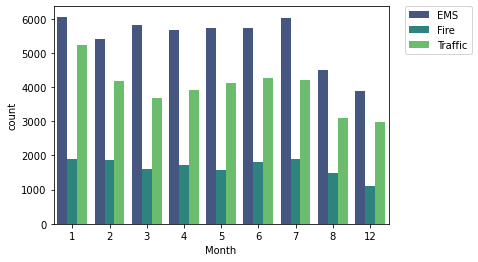

**Вы заметили что-то странное в графике?**

_____

**Вы должны были заметить, что пропущено несколько месяцев, давайте посмотрим, сможем ли мы заполнить эту информацию, отобразив информацию другим способом, возможно, простым линейным графиком, который заполняет пропущенные месяцы, для этого нам понадобится поработать с pandas...**

In [235]:
# Несколько месяцев отсутствует! 9,10 и 11 там нет.

**Теперь создайте объект gropuby с именем byMonth, где вы группируете DataFrame по столбцу месяца и используете метод count() для агрегирования. Используйте метод head() для отбражения первых строк DataFrame.**

In [287]:
byMonth = df.groupby(by='Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Dayofweek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Теперь создайте простой график из df, указывающий количество вызовов в месяц.**

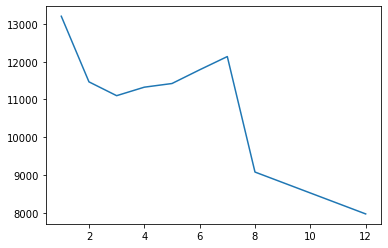

In [288]:
plt.plot(byMonth['desc'])

<AxesSubplot:xlabel='Month'>

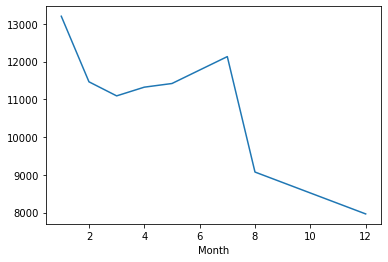

**Теперь посмотрите, можете ли вы использовать функцию lmplot() от seaborn для создания линейной регессии на данных количества вызовов в месяц. Имейте в виду, что вам может потребоваться сбросить индекс для столбца.**

In [289]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Dayofweek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


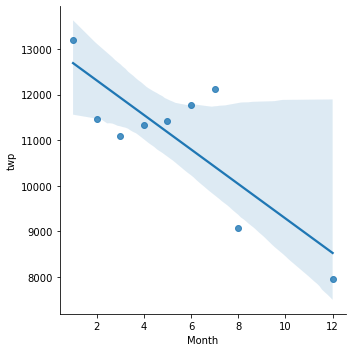

In [290]:
sns.lmplot(data=byMonth.reset_index(), x='Month', y='twp')

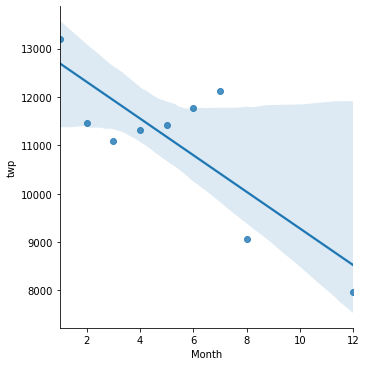

**Создайте новый столбец с именем «Date», который содержит дату из столбца timeStamp. Вам нужно будет использовать apply() вместе с методом .date()**

In [295]:
df['Date'] = df['timeStamp'].iloc[:].apply(lambda x: x.date())

In [296]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


**Теперь сгруппируйте (groupby) этот столбец Date с агрегатом count() и создайте график подсчета вызовов службы 911. **

In [345]:
byDate = df.groupby('Date').count()
byDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


(array([16770., 16801., 16832., 16861., 16892., 16922., 16953., 16983.,
        17014., 17045.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

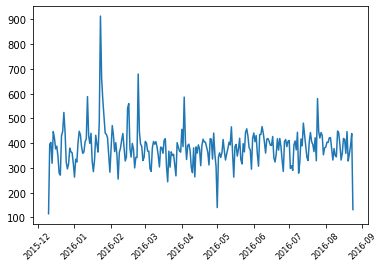

In [329]:
plt.plot(byDate['desc'])
plt.xticks(fontsize=8, rotation=45)

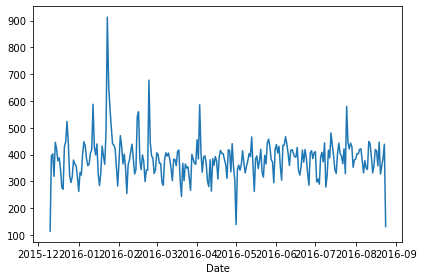

**Теперь воссоздайте этот график, но создайте 3 отдельных графика, каждый из которых представляет собой причину вызова (Reason) службы экстренной помощи 911**

In [397]:
byDateR = df.groupby(['Date', 'Reason'], as_index=False).count().set_index('Date')
byDateR

,Reason,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,EMS,57,57,57,52,57,57,57,57,57,57,57,57
2015-12-10,Fire,15,15,15,13,15,15,15,15,15,15,15,15
2015-12-10,Traffic,43,43,43,35,43,43,43,41,43,43,43,43
2015-12-11,EMS,186,186,186,166,186,186,186,186,186,186,186,186
2015-12-11,Fire,69,69,69,59,69,69,68,68,69,69,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-23,Fire,70,70,70,62,70,70,70,70,70,70,70,70
2016-08-23,Traffic,151,151,151,128,151,151,151,149,151,151,151,151
2016-08-24,EMS,71,71,71,59,71,71,71,71,71,71,71,71


(array([16770., 16801., 16832., 16861., 16892., 16922., 16953., 16983.,
        17014., 17045.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

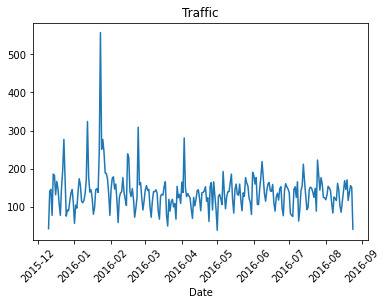

In [398]:
plt.plot(byDateR[byDateR['Reason']=='Traffic']['desc'])
plt.xlabel('Date')
plt.title('Traffic')
plt.xticks(rotation=45)

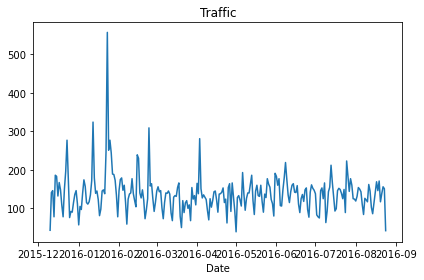

(array([16770., 16801., 16832., 16861., 16892., 16922., 16953., 16983.,
        17014., 17045.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

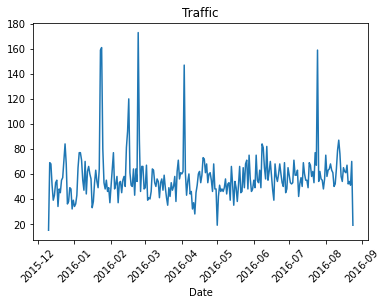

In [399]:
plt.plot(byDateR[byDateR['Reason']=='Fire']['desc'])
plt.xlabel('Date')
plt.title('Traffic')
plt.xticks(rotation=45)

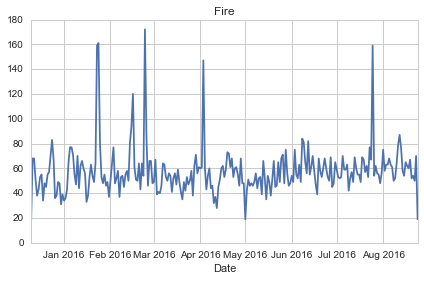

(array([16770., 16801., 16832., 16861., 16892., 16922., 16953., 16983.,
        17014., 17045.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

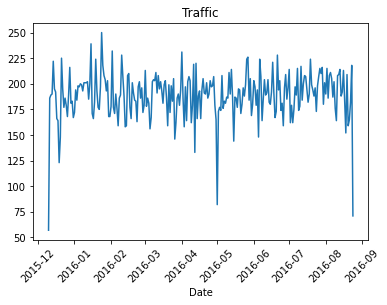

In [401]:
plt.plot(byDateR[byDateR['Reason']=='EMS']['desc'])
plt.xlabel('Date')
plt.title('Traffic')
plt.xticks(rotation=45)

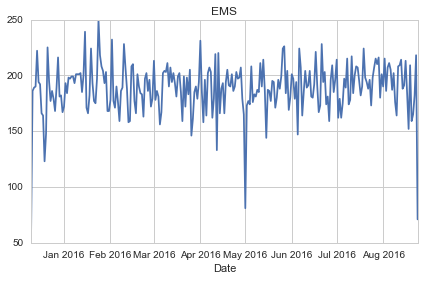

____
** Теперь перейдем к созданию тепловых карт с Seaborn и нашими данными. Сначала нам нужно реструктурировать дата фрейм, чтобы столбцы стали часами, а индекс стал днем недели. Есть много способов сделать это, но рекомендуем попробовать объединить groupby с [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) методом.**

In [495]:
day_hour = df.groupby(['Dayofweek', 'Hour'])['Hour'].count().unstack()
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Создайте тепловую карту, используя этот новый DataFrame. **

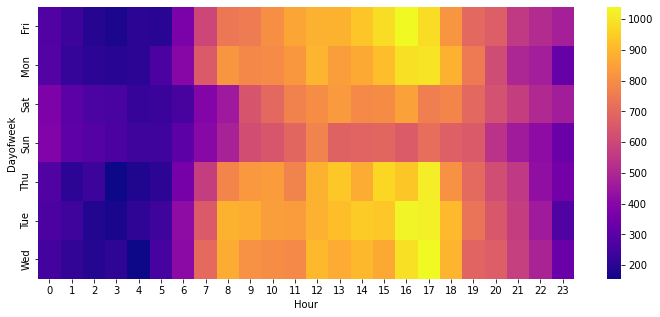

In [514]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.heatmap(day_hour, cmap='plasma')

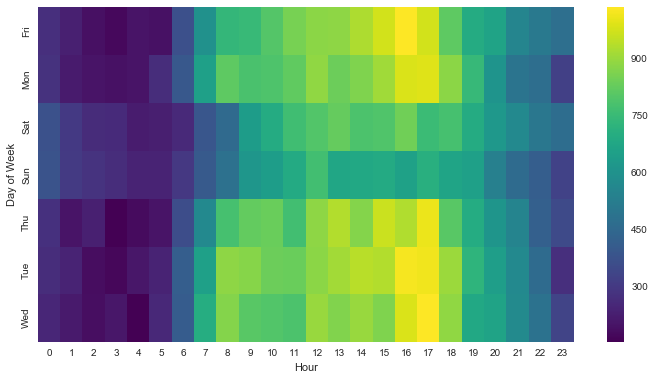

** Теперь создайте карту clustermap используя этот DataFrame. **

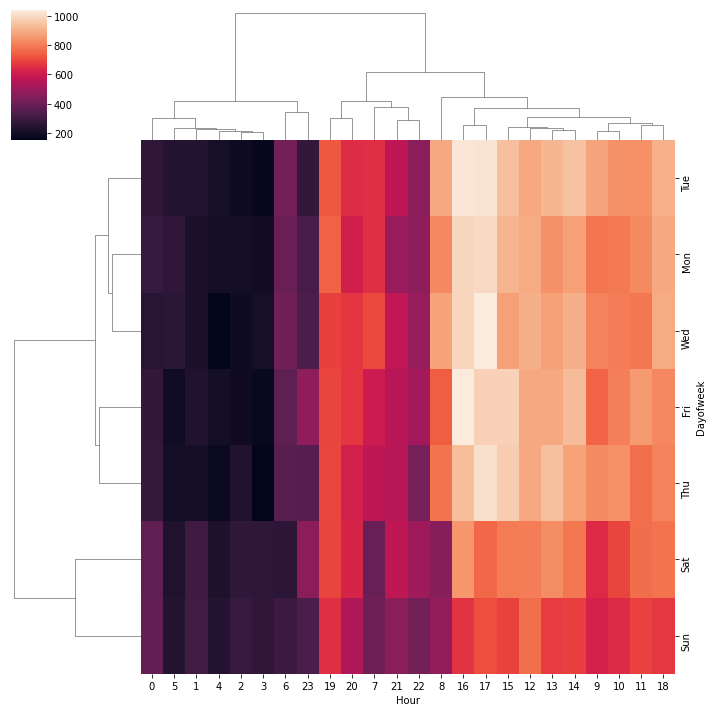

In [515]:
sns.clustermap(day_hour)

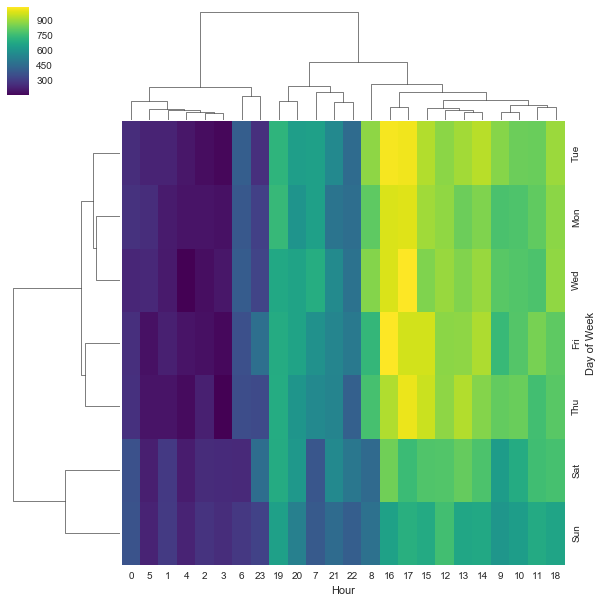

** Теперь повторите эти же графики и операции для DataFrame, в котором месяц отображается в виде столбца. **

In [518]:
day_month = df.groupby(['Dayofweek', 'Month'])['Month'].count().unstack()
day_month

Month,1,2,3,4,5,6,7,8,12
Dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


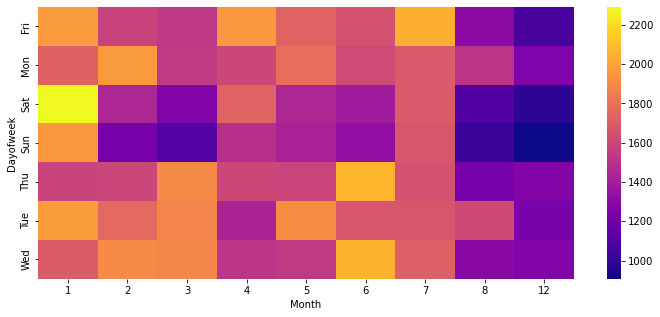

In [519]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.heatmap(day_month, cmap='plasma')

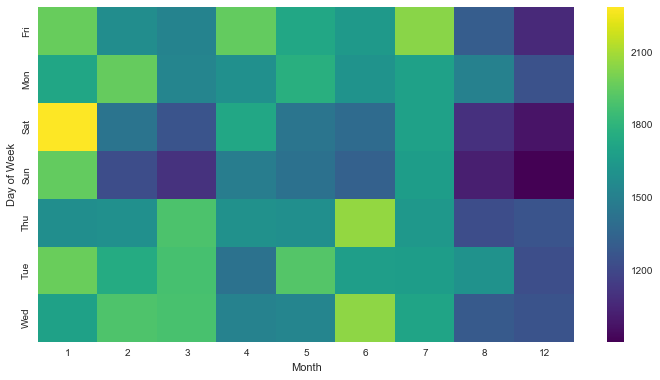

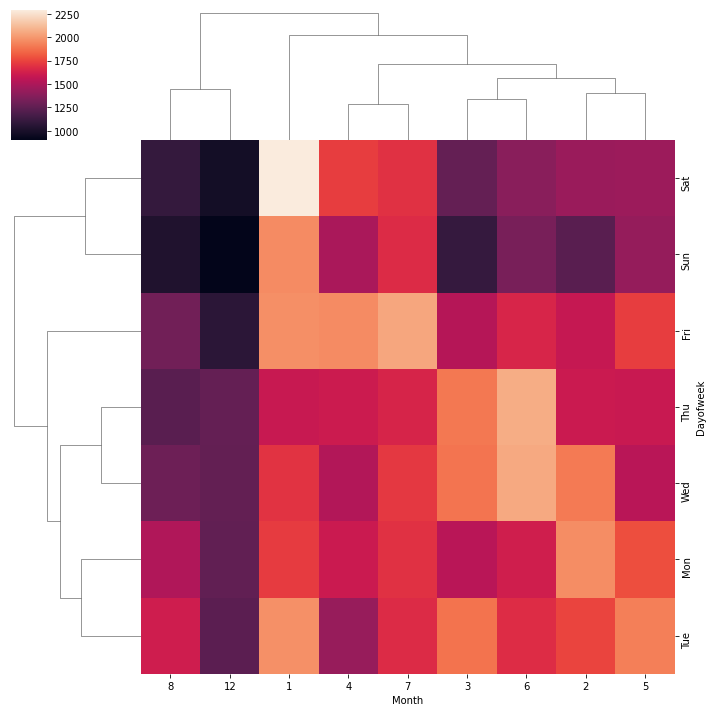

In [520]:
sns.clustermap(day_month)

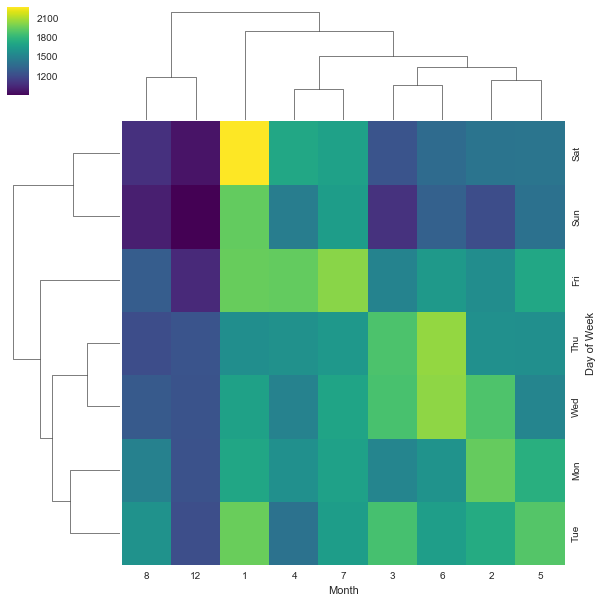

**Продолжайте изучать Данные так, как считаете нужным!**